In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(['PassengerId','Name','Parch','Cabin','Embarked','Ticket','Fare'],inplace=True,axis=1)

In [5]:
df.head()

,Survived,Pclass,Sex,Age,SibSp
0,0,3,male,22.0,1
1,1,1,female,38.0,1
2,1,3,female,26.0,0
3,1,1,female,35.0,1
4,0,3,male,35.0,0


In [6]:
df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
dtype: bool

In [7]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
dtype: int64

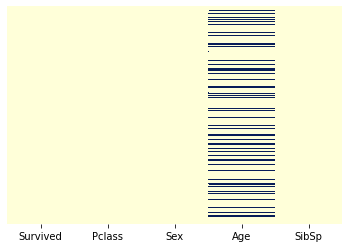

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

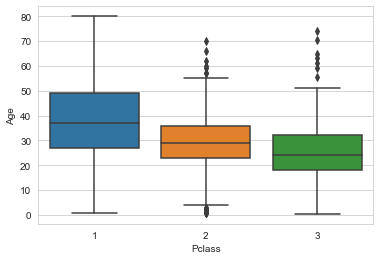

In [9]:
sns.set_style('whitegrid')
sns.boxplot(x = 'Pclass',y= df['Age'].dropna(),data = df)

In [10]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age  


In [11]:
df.Age = df[['Age','Pclass']].apply(impute_age,axis=1)

In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp
0,0,3,male,22.0,1
1,1,1,female,38.0,1
2,1,3,female,26.0,0
3,1,1,female,35.0,1
4,0,3,male,35.0,0


In [13]:
Sex = pd.get_dummies(df.Sex,drop_first=True)

In [14]:
df = pd.concat([df,Sex],axis=1)

In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,male
0,0,3,male,22.0,1,1
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,1


In [16]:
df.drop('Sex',inplace=True,axis=1)

In [17]:
df.head()

,Survived,Pclass,Age,SibSp,male
0,0,3,22.0,1,1
1,1,1,38.0,1,0
2,1,3,26.0,0,0
3,1,1,35.0,1,0
4,0,3,35.0,0,1


In [18]:
X = df.drop('Survived',axis=1)
y = df.Survived

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [20]:
from sklearn.naive_bayes import GaussianNB
GB = GaussianNB()

In [21]:
GB.fit(X_train,y_train)

GaussianNB()

In [22]:
GB.score(X_test,y_test)

0.7821229050279329

In [23]:
predictions = GB.predict(X_test)
from sklearn.metrics import confusion_matrix


In [24]:
confusion_matrix(y_test,predictions)

array([[90, 20],
       [19, 50]], dtype=int64)

# Fraud Detection using count vectorizer

In [25]:
sp = pd.read_csv('spam.csv')

In [26]:
sp.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
sp['Spam'] = sp['Category'].apply(lambda x: 1 if x=='spam' else 0)


In [28]:
sp.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [29]:
X = sp.Message
y = sp.Spam

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)

In [33]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train_count,y_train)

MultinomialNB()

In [35]:
emails = [
    'Hey vishal, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!',
    'I have your number!!!'
]

In [36]:
emails_count = v.transform(emails)

In [37]:
MNB.predict(emails_count)

array([0, 1, 0], dtype=int64)

In [38]:
X_test_count = v.transform(X_test)

In [39]:
MNB.score(X_test_count,y_test)

0.9865470852017937

Now every time we have to transform the values using count vectorizer.To reduce this we'll use pipeline 


In [40]:
from sklearn.pipeline import Pipeline

In [51]:
clf = Pipeline([('vectorizer',CountVectorizer()),
               ('MNB',MultinomialNB())],verbose=True)

In [52]:
clf.fit(X_train,y_train)

[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing MNB, total=   0.0s


Pipeline(steps=[('vectorizer', CountVectorizer()), ('MNB', MultinomialNB())],
         verbose=True)

In [53]:
clf.score(X_test,y_test)

0.9865470852017937